## A PROJECT ON REAL ESTATE LISTINGS IN PORTUGAL

In [1]:
# Load all needed libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
# Load the dataset and view the first 5 records
dt = r"C:\Users\Etebom\Videos\RGN\group_project\portugal_listings.csv"
dn = pd.read_csv(dt, low_memory=False)
dn.head()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,...,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,...,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,...,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,...,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0


In [3]:
# Dataset dimension
dn.shape

(123690, 25)

In [4]:
# Summary of dataframe information
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123690 entries, 0 to 123689
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  123408 non-null  float64
 1   District               123690 non-null  object 
 2   City                   123690 non-null  object 
 3   Town                   123688 non-null  object 
 4   Type                   123674 non-null  object 
 5   EnergyCertificate      123676 non-null  object 
 6   Floor                  27929 non-null   object 
 7   Parking                123496 non-null  float64
 8   HasParking             68215 non-null   object 
 9   ConstructionYear       80386 non-null   float64
 10  TotalArea              116380 non-null  float64
 11  GrossArea              27638 non-null   float64
 12  EnergyEfficiencyLevel  55443 non-null   object 
 13  PublishDate            21122 non-null   object 
 14  Garage                 55443 non-nul

In [5]:
# Dataframe's descriptive statistics of numerical columns
dn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,123408.0,367010.304823,3.978471e+06,1.0,80000.000,200000.00,390450.0,1.380000e+09
Parking,123496.0,0.563735,8.640460e-01,0.0,0.000,0.00,1.0,3.000000e+00
ConstructionYear,80386.0,1989.030714,2.666099e+01,1900.0,1972.000,1994.00,2008.0,2.024000e+03
TotalArea,116380.0,561494.249923,1.800916e+08,-7196067.0,93.000,168.00,560.0,6.142007e+10
GrossArea,27638.0,2789.732687,1.153670e+05,-7.0,100.000,164.00,294.0,1.275000e+07
TotalRooms,68896.0,3.171853,1.080286e+01,0.0,2.000,3.00,4.0,2.751000e+03
NumberOfBedrooms,37614.0,2.684213,1.856388e+00,0.0,2.000,3.00,3.0,2.100000e+01
NumberOfWC,48905.0,0.416420,1.017038e+00,-15.0,0.000,0.00,1.0,5.900000e+01
LivingArea,94894.0,1481.221278,3.638628e+04,0.0,80.000,120.00,210.0,5.429000e+06
LotSize,33521.0,64790.964052,5.659405e+06,0.0,285.000,750.00,3150.0,9.923010e+08


In [6]:
# Removing negative signs from affected columns
dn[['TotalArea', 'GrossArea', 'NumberOfWC', 'BuiltArea', 'NumberOfBathrooms']] = dn[['TotalArea', 'GrossArea', 'NumberOfWC', 'BuiltArea', 'NumberOfBathrooms']].abs()
dn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,123408.0,367010.304823,3.978471e+06,1.0,80000.000,200000.00,390450.0,1.380000e+09
Parking,123496.0,0.563735,8.640460e-01,0.0,0.000,0.00,1.0,3.000000e+00
ConstructionYear,80386.0,1989.030714,2.666099e+01,1900.0,1972.000,1994.00,2008.0,2.024000e+03
TotalArea,116380.0,561617.940402,1.800916e+08,0.0,93.000,169.00,560.0,6.142007e+10
GrossArea,27638.0,2789.733266,1.153670e+05,0.0,100.000,164.00,294.0,1.275000e+07
TotalRooms,68896.0,3.171853,1.080286e+01,0.0,2.000,3.00,4.0,2.751000e+03
NumberOfBedrooms,37614.0,2.684213,1.856388e+00,0.0,2.000,3.00,3.0,2.100000e+01
NumberOfWC,48905.0,0.417033,1.016786e+00,0.0,0.000,0.00,1.0,5.900000e+01
LivingArea,94894.0,1481.221278,3.638628e+04,0.0,80.000,120.00,210.0,5.429000e+06
LotSize,33521.0,64790.964052,5.659405e+06,0.0,285.000,750.00,3150.0,9.923010e+08


In [7]:
# Replacing booleans with string alternatives
dn = dn.replace({True:'Yes', False:'No'})
dn.tail()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
123685,249000.0,Setúbal,Almada,Charneca de Caparica e Sobreda,Apartment,C,NaN,0.0,NaN,2007.0,...,Yes,No,3.0,2.0,1.0,NaN,80.0,248.0,80.0,1.0
123686,500000.0,Setúbal,Almada,Charneca de Caparica e Sobreda,Apartment,A+,NaN,1.0,NaN,2021.0,...,Yes,Yes,NaN,3.0,1.0,Like new,96.0,NaN,115.0,3.0
123687,177500.0,Setúbal,Seixal,"Seixal, Arrentela e Aldeia de Paio Pires",Apartment,C,NaN,0.0,NaN,1984.0,...,No,No,3.0,2.0,0.0,NaN,81.0,134.0,134.2,1.0
123688,110000.0,Vila Real,Peso da Régua,Sedielos,Farm,F,NaN,0.0,NaN,1938.0,...,No,No,NaN,1.0,0.0,NaN,40.0,7799.0,80.0,1.0
123689,70000.0,Vila Real,Montalegre,Tourém,House,NC,NaN,0.0,NaN,1937.0,...,No,No,NaN,2.0,0.0,NaN,262.0,240.0,NaN,0.0


In [8]:
# Summary of null values count
dn.isnull().sum()

Price                       282
District                      0
City                          0
Town                          2
Type                         16
EnergyCertificate            14
Floor                     95761
Parking                     194
HasParking                55475
ConstructionYear          43304
TotalArea                  7310
GrossArea                 96052
EnergyEfficiencyLevel     68247
PublishDate              102568
Garage                    68247
Elevator                     32
ElectricCarsCharging      68247
TotalRooms                54794
NumberOfBedrooms          86076
NumberOfWC                74785
ConservationStatus       107660
LivingArea                28796
LotSize                   90169
BuiltArea                101595
NumberOfBathrooms          5967
dtype: int64

In [9]:
# Percentage of missing values per column
(dn.isnull().mean() * 100).round(2)

Price                     0.23
District                  0.00
City                      0.00
Town                      0.00
Type                      0.01
EnergyCertificate         0.01
Floor                    77.42
Parking                   0.16
HasParking               44.85
ConstructionYear         35.01
TotalArea                 5.91
GrossArea                77.66
EnergyEfficiencyLevel    55.18
PublishDate              82.92
Garage                   55.18
Elevator                  0.03
ElectricCarsCharging     55.18
TotalRooms               44.30
NumberOfBedrooms         69.59
NumberOfWC               60.46
ConservationStatus       87.04
LivingArea               23.28
LotSize                  72.90
BuiltArea                82.14
NumberOfBathrooms         4.82
dtype: float64

In [10]:
# Fill missing values for categorical and numerical columns

# Getting Categorical columns
cat_cols = dn.select_dtypes(include= 'object').columns

# Filling null values for categorical columns
dn[cat_cols] = dn[cat_cols].fillna('Not recorded')


In [11]:
dn.isnull().sum()

Price                       282
District                      0
City                          0
Town                          0
Type                          0
EnergyCertificate             0
Floor                         0
Parking                     194
HasParking                    0
ConstructionYear          43304
TotalArea                  7310
GrossArea                 96052
EnergyEfficiencyLevel         0
PublishDate                   0
Garage                        0
Elevator                      0
ElectricCarsCharging          0
TotalRooms                54794
NumberOfBedrooms          86076
NumberOfWC                74785
ConservationStatus            0
LivingArea                28796
LotSize                   90169
BuiltArea                101595
NumberOfBathrooms          5967
dtype: int64

In [12]:
# Filling null values for Price column
dn['Price'] = dn['Price'].ffill()
dn['Price'].isnull().sum()

0

In [13]:
# Checking for duplicate rows
dn.duplicated().sum()

7370

In [14]:
# Drop duplicated rows
dn = dn.drop_duplicates()

#### PRICE DISTRIBUTION OF PROPERTIES BY DISTRICT

In [15]:
dn_pd = dn.groupby('District', as_index=False)['Price'].mean()
dn_pd_sorted = dn_pd.sort_values(by='Price', ascending=False)
dn_pd_sorted[:5]

,District,Price
6,Faro,711928.582020
15,Lisboa,578832.187134
23,Z - Fora de Portugal,534400.000000
19,Setúbal,427740.015628
17,Porto,343293.987554


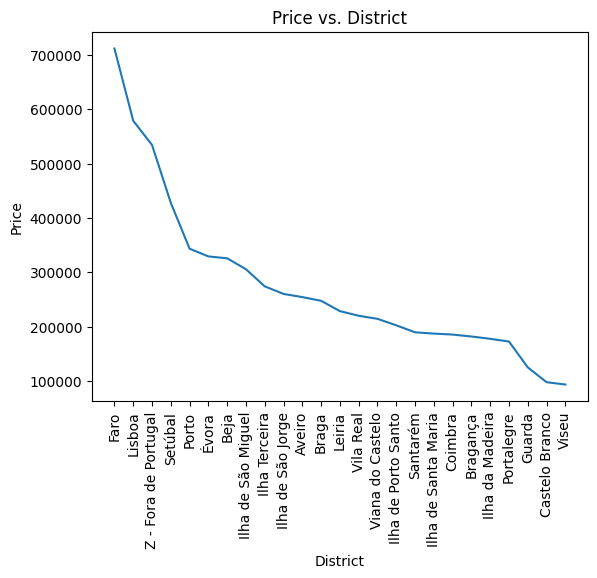

In [16]:
sns.lineplot(x='District', y='Price', data=dn_pd_sorted)
plt.title('Price vs. District')
plt.xticks(rotation=90)
plt.show()

The Top 5 most expensive districts are Faro, Lisboa, Fora de Portugal, Porto, and Setubal

#### TOP 5 PROPERTY TYPES BY AVERAGE PRICE

In [17]:
dn_ty = dn.groupby('Type', as_index=False)['Price'].mean()
dn_ty_sorted = dn_ty.sort_values(by='Price', ascending=False)

C:\Users\Etebom\AppData\Local\Temp\ipykernel_7292\2693514644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Price', data=dn_ty_sorted[:5], palette='dark')


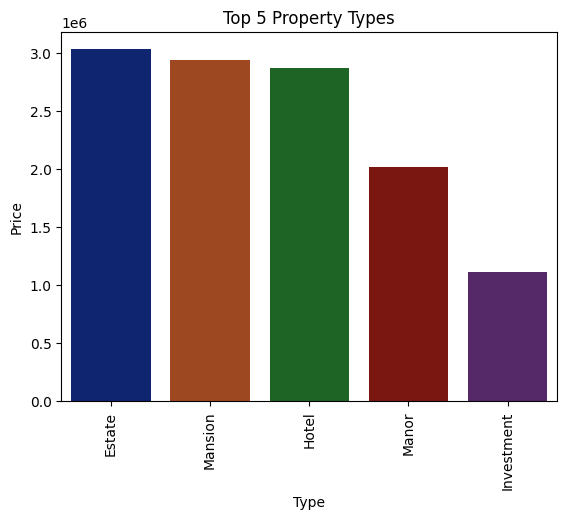

In [18]:
sns.barplot(x='Type', y='Price', data=dn_ty_sorted[:5], palette='dark')
plt.title('Top 5 Property Types')
plt.xticks(rotation=90)
plt.show()

#### TOP 10 MOST EXPENSIVE ENERGYCERTIFICATE CATEGORIES

In [19]:
dn_ec = dn.groupby('EnergyCertificate', as_index=False)['Price'].mean()
dn_ec_sorted = dn_ec.sort_values(by='Price', ascending=False)
dn_ec_sorted[:10]

,EnergyCertificate,Price
0,A,638205.964805
2,B,613959.839509
1,A+,587669.737998
3,B-,554951.452314
4,C,413805.248854
5,D,381267.450594
6,E,329598.376213
8,G,313852.916667
11,Not available,290982.352941
9,NC,285830.647996


C:\Users\Etebom\AppData\Local\Temp\ipykernel_7292\3415379688.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='EnergyCertificate', x='Price', data=dn_ec_sorted[:10], palette='deep')


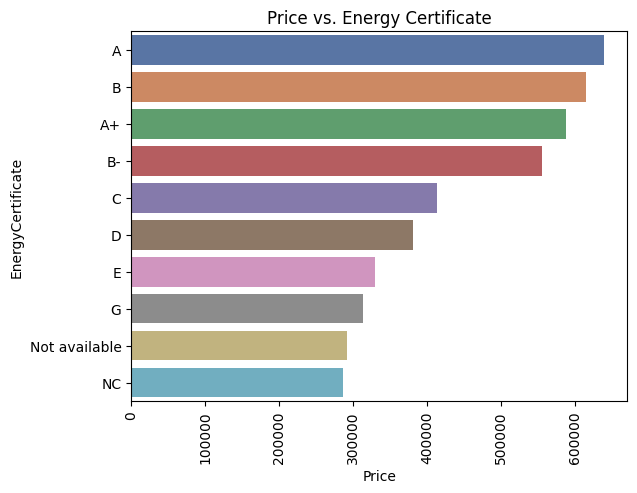

In [20]:
sns.barplot(y='EnergyCertificate', x='Price', data=dn_ec_sorted[:10], palette='deep')
plt.title('Price vs. Energy Certificate')
plt.xticks(rotation=90)
plt.show()

### ENERGY EFFICIENCY LEVEL AND PRICE

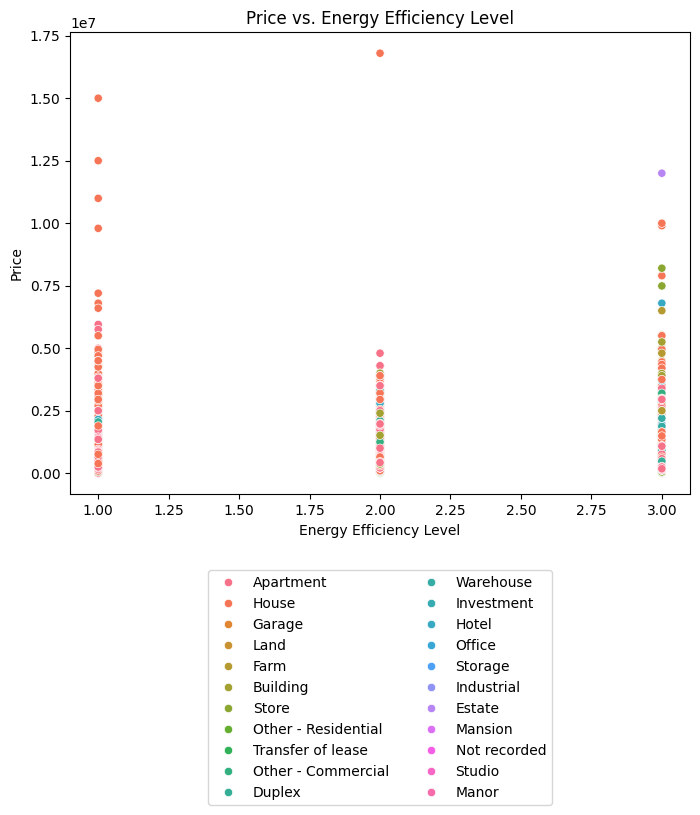

In [21]:
dn['EnergyEfficiencyNumeric'] = dn['EnergyEfficiencyLevel'].map({'A': 1, 'B': 2, 'C': 3})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='EnergyEfficiencyNumeric', y='Price', hue='Type', data=dn)
plt.title('Price vs. Energy Efficiency Level')
plt.xlabel('Energy Efficiency Level')
plt.ylabel('Price')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()


From the plot, Energy Efficiency Level 1 is characterized by Apartments, Houses, Warehouses, and Garages.  
Energy Efficiency Level 2 is characterized by Apartments, Houses, Garages and a few Mansions along with Studios and Manors.  
Energy Efficiency Level 3 is characterized by luxury properties. 

### NUMBER OF BEDROOMS BY PRICE AND PROPERTY TYPE

In [22]:
dn_bpt = dn.groupby(['Type', 'NumberOfBedrooms']).agg({'Price': 'mean'}).reset_index()
dn_bpt_sorted = dn_bpt.sort_values(by='Price', ascending=False)

dn_bpt_sorted.head()

,Type,NumberOfBedrooms,Price
46,Estate,9.0,12000000.0
137,Mansion,8.0,8500000.0
47,Estate,10.0,5800000.0
138,Mansion,9.0,4500000.0
45,Estate,8.0,4045000.0


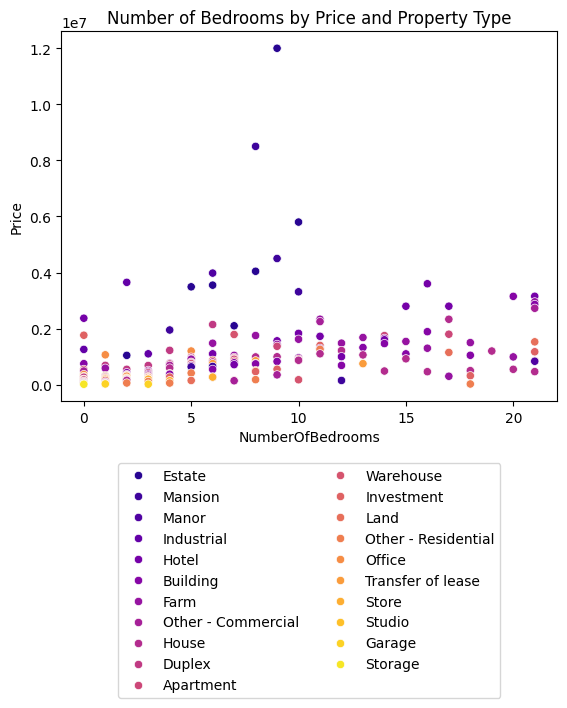

In [23]:
sns.scatterplot(x='NumberOfBedrooms', y='Price', hue='Type', data=dn_bpt_sorted, palette='plasma')
plt.title('Number of Bedrooms by Price and Property Type')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

We can see that the 5 to 10 bedroom gap has the most expensive property types.  
These property types are mainly Estates, Manors, Mansions, and industrial properties.  
The other property types are not above an average price of 40million euros.

### CORRELATION HEATMAP OF ALL NUMERICAL VARIABLES

In [24]:
# Getting numerical columns
num_cols = dn.select_dtypes(include='number').columns
num_cols

Index(['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'GrossArea',
       'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize',
       'BuiltArea', 'NumberOfBathrooms', 'EnergyEfficiencyNumeric'],
      dtype='object')

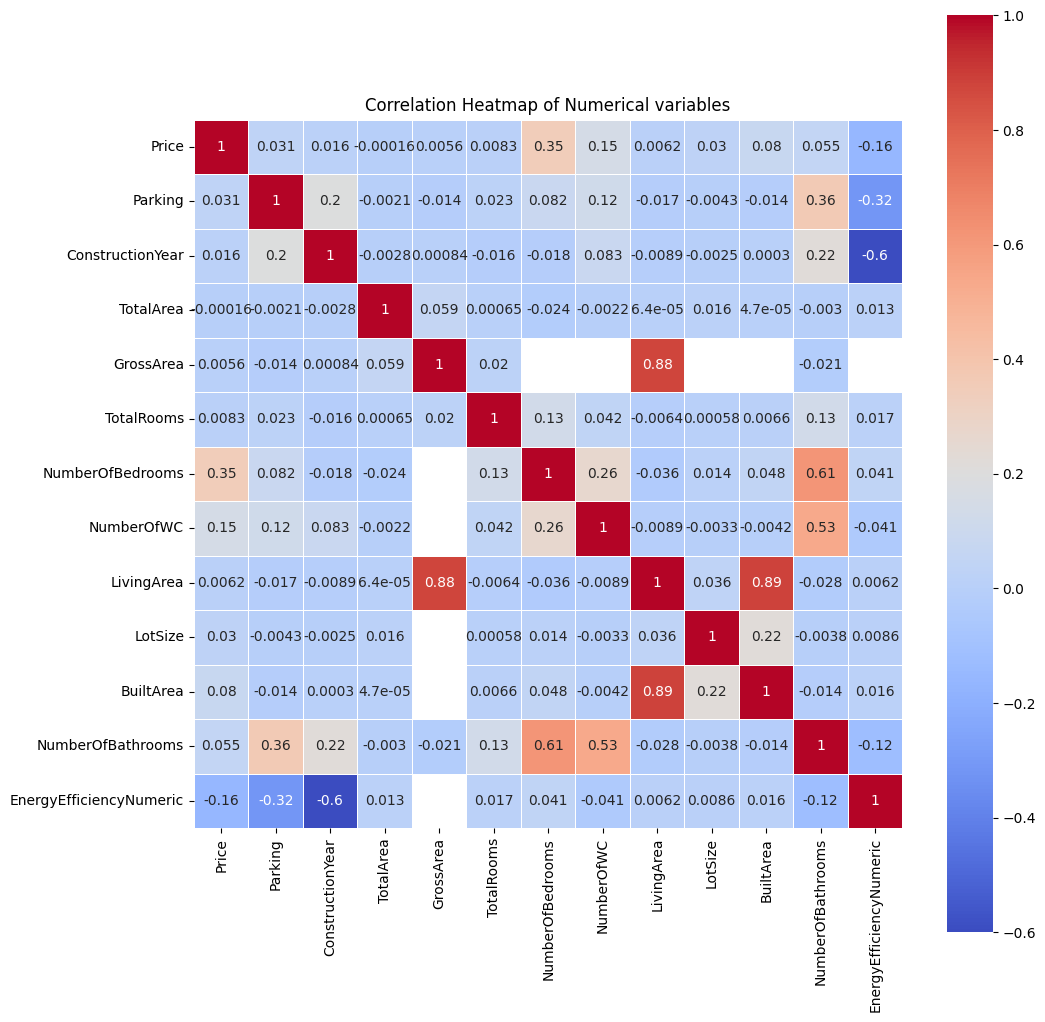

In [25]:
plt.figure(figsize=(20, 20))  
plt.subplot(2, 2, 4)
correlation_matrix = dn[num_cols].corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical variables')
plt.tight_layout()
plt.show()


NumberOfBathrooms is strongly correlated with NumberOfWC and NumberOfBedrooms.  
BuiltArea is very strongly correlated with LivingArea.  
LivingArea is very strongly correlated with GrossArea.  
The rest of the columns are weakly correlated to one another.

### PRICE BY CONSTRUCTION YEAR 

In [26]:
dn_cy = dn.groupby('ConstructionYear', as_index=False)['Price'].sum()
dn_cy_sorted = dn_cy.sort_values(by='Price', ascending=False)
dn_cy_sorted

,ConstructionYear,Price
122,2023.0,2.659072e+09
123,2024.0,2.162777e+09
82,1983.0,1.606350e+09
121,2022.0,1.191205e+09
50,1951.0,1.098420e+09
...,...,...
13,1914.0,3.600000e+05
14,1915.0,2.750000e+05
8,1909.0,2.200000e+05
16,1917.0,8.000000e+04


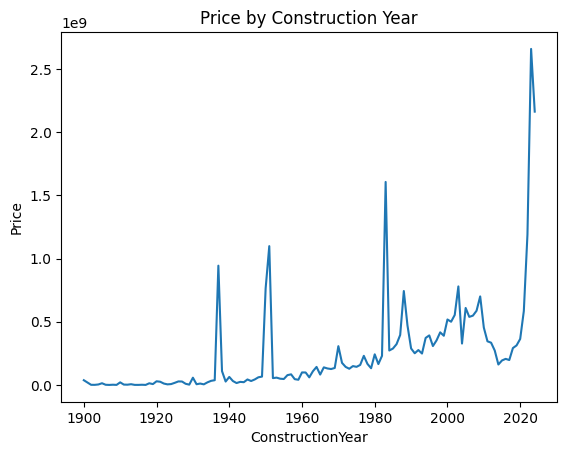

In [27]:
sns.lineplot(x='ConstructionYear', y='Price', data=dn_cy_sorted)
plt.title('Price by Construction Year')
plt.show()

### PROJECT NOTES

First, we imported all necessary libraries for data processing.  

Then we loaded the downloaded dataset to pandas using the read csv function  
and made a view of the dataframe in order to understand each variable and their respective content.  

Next, we applied the info function in order to get such details as the shape, column datatypes, number of  
observations available for each column, and how much memory is used by the data.  

We observed from the first descriptive statistics that there were negative values in columns that should  
not contain such like TotalArea and NumberOfWC columns. To handle that, we removed the negative signs for  
all the affected columns.  

For some categorical columns like Elevator and ElectricCarsCharging, boolean values were used to denote the  
presence or absence of such facility on properties recorded. In order to avoid complications in the analytical  
process, we replaced the boolean values with string alternatives.  

A check for missing values was conducted where it was discovered that most columns had a  
lot of missing values. Filling them all would lead to errorneous results. For categorical columns, they were  
filled with 'Not recorded' while numerical columns were left unchanged except for Price which was a sensitive variable  
in the analysis. The missing values were forward-filled for the Price column only.  

Duplicate records were sought out. It turns out that there were 7,370 duplicated rows.  
Even though they summed up to more than five percent of the total number of rows, they were dropped.  

Columns with over ten percent (10%) of missing data were not used as they would not provide accurate results.  

The following analysis were conducted:  
- Property Price distribution by Districts
- Top 5 property Types by Average Price
- Top 10 most expensive Energy Certificate categories
- Energy efficiency level and Price
- Number of Bedrooms by Property Type and Price
- Correlation heatmap of numerical variables
- Property Price and Construction year

